<a href="https://colab.research.google.com/github/saadiiroy/Image-Classification-Using-CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras

In [ ]:
import numpy as np
import pandas as pd
import keras

from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D ,MaxPooling2D
import tensorflow as tf


In [ ]:
from keras.datasets import mnist
(X_train , Y_train), (X_test,Y_test)= mnist.load_data()
X_train

11490434/11490434 [==============================] - 0s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /=255
X_test /=255

In [ ]:
from keras.utils import to_categorical
classes=10
Y_train=to_categorical(Y_train,classes)
Y_test=to_categorical(Y_test,classes)
X_train.shape


(60000, 28, 28, 1)

In [ ]:
img_row, img_col,chanels=28,28,1
filter=[6,32,80,120]
clasess=10


In [ ]:


model = Sequential()
model.add(Conv2D(filters=filter[0], kernel_size=(3, 3), padding='same', activation='relu', input_shape=(img_row, img_col, chanels)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=filter[1], kernel_size=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=filter[2], kernel_size=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=filter[3], kernel_size=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])




In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 80)         

In [ ]:
model.fit(X_train,Y_train,validation_split=0.2,epochs=15,batch_size=64,verbose=1)

Epoch 1/15
750/750 [==============================] - 15s 6ms/step - loss: 2.2509 - accuracy: 0.2452 - val_loss: 2.0289 - val_accuracy: 0.4383
Epoch 2/15
750/750 [==============================] - 4s 5ms/step - loss: 0.9588 - accuracy: 0.7024 - val_loss: 0.3503 - val_accuracy: 0.8893
Epoch 3/15
750/750 [==============================] - 4s 5ms/step - loss: 0.3040 - accuracy: 0.9046 - val_loss: 0.2218 - val_accuracy: 0.9305
Epoch 4/15
750/750 [==============================] - 4s 6ms/step - loss: 0.1912 - accuracy: 0.9406 - val_loss: 0.1761 - val_accuracy: 0.9423
Epoch 5/15
750/750 [==============================] - 4s 6ms/step - loss: 0.1408 - accuracy: 0.9567 - val_loss: 0.1214 - val_accuracy: 0.9615
Epoch 6/15
750/750 [==============================] - 3s 5ms/step - loss: 0.1125 - accuracy: 0.9648 - val_loss: 0.1241 - val_accuracy: 0.9617
Epoch 7/15
750/750 [==============================] - 5s 6ms/step - loss: 0.0962 - accuracy: 0.9697 - val_loss: 0.1122 - val_accuracy: 0.9637
Epoch

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
y_pred_probs=model.predict(X_test,verbose=0)
y_pred=np.where(y_pred_probs>0.5,1,0)
test_accuracy=accuracy_score(y_pred,Y_test)
print("\nTest acuracy:{}".format(test_accuracy))


Test acuracy:0.9809


1/1 [==============================] - 0s 115ms/step


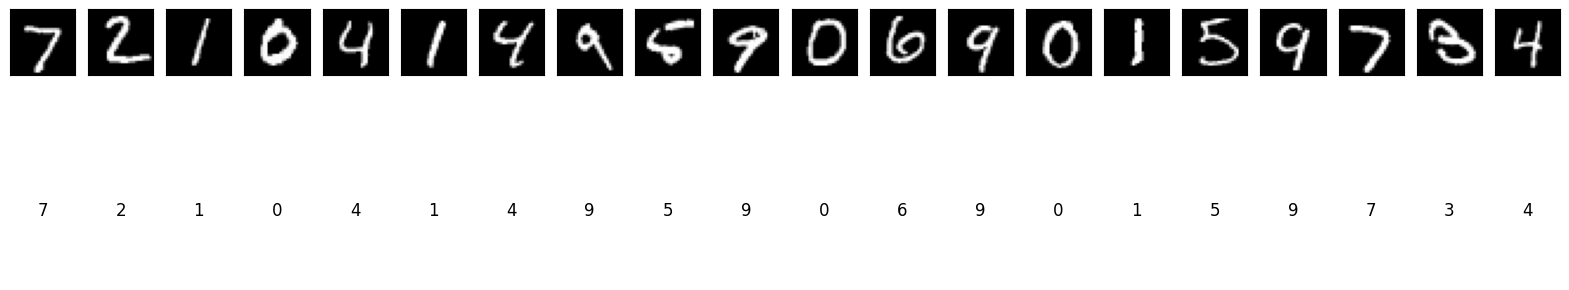

In [ ]:
mask=range(20,50)
X_valid=X_test[0:20]
actual_labels=Y_test[0:20]
y_pred_probs_valid=model.predict(X_valid)
y_pred_valid=np.where(y_pred_probs_valid>0.5,1,0)
n=len(X_valid)
plt.figure(figsize=(20,4))
for i in range (n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(X_valid[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  prediccted_digit=np.argmax(y_pred_probs_valid[i])
  ax=plt.subplot(2,n,i+1+n)
  plt.text(0.5,0.5,str(prediccted_digit),fontsize=12,ha='center',va='center')
  plt.axis('off')

plt.show()
plt.close()